# Import needed libraries

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import random

#random.seed(123)

# Import python modules

In [2]:
# Get the absolute path of the folders that contain the modules
[sys.path.append(os.path.abspath(os.path.join(os.getcwd(), path))) for path in ["../src/data/", "../src/features/models/"]]

# Import notebooks
import download_datasets
import dataset_controls
import random_data_generator
import logistic_model

# Download files from cloud

In [3]:
# File IDs dictionary
file_ids = {
    "dim_people": "1Hi3wPL3FlYQXpbdqTtNK8VTWePbIiCCR",
    "fact_games_played": "1Z-FhR0RRPHJYaolFPOAbmwiRNTWz-QSN", 
}

# Get the path two levels up from the current working directory
base_path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))

# Loop through all files in the dictionary and download them
for file_name, file_id in file_ids.items():
    print(f"Downloading {file_name}...")
    
    # Construct the full URL to download the file using the file ID
    url = f"https://drive.google.com/uc?id={file_id}"
    
    # Call the function to download the file with the constructed URL
    download_datasets.download_file_from_cloud(url, base_path)

    print(f"{file_name} saved successfully!\n")

Downloading...
From: https://drive.google.com/uc?id=1Hi3wPL3FlYQXpbdqTtNK8VTWePbIiCCR
To: c:\Users\Oscar\OneDrive\Documentos\Github\SeniorTrAIning\main_data\notebooks\dim_people.csv
100%|██████████| 191k/191k [00:00<00:00, 2.75MB/s]


File saved at: c:\Users\Oscar\OneDrive\Documentos\Github\dim_people.csv
File successfully loaded. First rows:
dim_people saved successfully!



Downloading...
From: https://drive.google.com/uc?id=1Z-FhR0RRPHJYaolFPOAbmwiRNTWz-QSN
To: c:\Users\Oscar\OneDrive\Documentos\Github\SeniorTrAIning\main_data\notebooks\fact_games_played.csv
100%|██████████| 54.0/54.0 [00:00<?, ?B/s]

File saved at: c:\Users\Oscar\OneDrive\Documentos\Github\fact_games_played.csv
File successfully loaded. First rows:
fact_games_played saved successfully!



# Load the dataframes

In [4]:
dict_dfs = download_datasets.opening_dataframes(file_ids, base_path)

Loading dim_people.csv...
Loading fact_games_played.csv...


# Generate random data

## DIM_people

In [5]:
random_data_generator.change_id_to_autoincrement(dict_dfs['dim_people'])

,ID,first_name,last_name,gender,date_birth,age,salary,city_of_birth,country,email,...,nationality,marital_status,education_level,occupation,languages_spoken,height,weight,health_conditions,medications,hobbies
0,1,Océane,Mathy,Male,9/27/1955,77,Real,Goianira,Brazil,tmathy0@mapquest.com,...,British,Married,University,Chief Design Engineer,Italian,149,117,Diabetes,Aspirin,Yoga
1,2,Gérald,Dewitt,Female,2/26/1959,88,Rupiah,Bogorejo,Indonesia,mdewitt1@nymag.com,...,British,Single,Primary School,Sales Associate,French,157,51,Diabetes,Insulin,Yoga
2,3,Mélinda,Blacker,Male,6/22/1956,82,Euro,Kónitsa,Greece,dblacker2@wiley.com,...,Spanish,Married,University,VP Sales,Italian,150,112,Diabetes,Ibuprofen,Yoga
3,4,Zoé,Vales,Female,11/6/1951,100,Real,Januária,Brazil,dvales3@cafepress.com,...,British,Divorced,University,Legal Assistant,Italian,154,108,Diabetes,Insulin,Yoga
4,5,Lèi,Broster,Female,11/24/1952,65,Quetzal,Zaragoza,Guatemala,mbroster4@hatena.ne.jp,...,Spanish,Married,High School,Nuclear Power Engineer,Italian,144,67,Diabetes,Ibuprofen,Yoga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Cunégonde,Worters,Female,12/7/1957,99,Krona,Johanneshov,Sweden,iwortersrn@yale.edu,...,British,Married,High School,Sales Associate,French,185,58,Hypertension,Insulin,Painting
996,997,Léandre,Petrasek,Male,11/23/1953,34,Marka,Solina,Bosnia and Herzegovina,wpetrasekro@t.co,...,French,Married,High School,Mechanical Systems Engineer,Italian,144,93,Diabetes,Insulin,Reading
997,998,Marlène,Athelstan,Male,3/27/1952,43,Ruble,Kalinovskaya,Russia,sathelstanrp@mayoclinic.com,...,British,Married,University,GIS Technical Architect,Italian,159,95,Arthritis,Ibuprofen,Gardening
998,999,Frédérique,Philimore,Female,6/7/1952,30,Yuan Renminbi,Jiyang,China,bphilimorerq@archive.org,...,British,Single,Primary School,Marketing Manager,Italian,152,76,Arthritis,Aspirin,Yoga


In [6]:
dataset_controls.calculate_age(dict_dfs['dim_people'], 'date_birth')

,ID,first_name,last_name,gender,date_birth,age,salary,city_of_birth,country,email,...,nationality,marital_status,education_level,occupation,languages_spoken,height,weight,health_conditions,medications,hobbies
0,1,Océane,Mathy,Male,1955-09-27,69,Real,Goianira,Brazil,tmathy0@mapquest.com,...,British,Married,University,Chief Design Engineer,Italian,149,117,Diabetes,Aspirin,Yoga
1,2,Gérald,Dewitt,Female,1959-02-26,65,Rupiah,Bogorejo,Indonesia,mdewitt1@nymag.com,...,British,Single,Primary School,Sales Associate,French,157,51,Diabetes,Insulin,Yoga
2,3,Mélinda,Blacker,Male,1956-06-22,68,Euro,Kónitsa,Greece,dblacker2@wiley.com,...,Spanish,Married,University,VP Sales,Italian,150,112,Diabetes,Ibuprofen,Yoga
3,4,Zoé,Vales,Female,1951-11-06,73,Real,Januária,Brazil,dvales3@cafepress.com,...,British,Divorced,University,Legal Assistant,Italian,154,108,Diabetes,Insulin,Yoga
4,5,Lèi,Broster,Female,1952-11-24,72,Quetzal,Zaragoza,Guatemala,mbroster4@hatena.ne.jp,...,Spanish,Married,High School,Nuclear Power Engineer,Italian,144,67,Diabetes,Ibuprofen,Yoga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Cunégonde,Worters,Female,1957-12-07,67,Krona,Johanneshov,Sweden,iwortersrn@yale.edu,...,British,Married,High School,Sales Associate,French,185,58,Hypertension,Insulin,Painting
996,997,Léandre,Petrasek,Male,1953-11-23,71,Marka,Solina,Bosnia and Herzegovina,wpetrasekro@t.co,...,French,Married,High School,Mechanical Systems Engineer,Italian,144,93,Diabetes,Insulin,Reading
997,998,Marlène,Athelstan,Male,1952-03-27,72,Ruble,Kalinovskaya,Russia,sathelstanrp@mayoclinic.com,...,British,Married,University,GIS Technical Architect,Italian,159,95,Arthritis,Ibuprofen,Gardening
998,999,Frédérique,Philimore,Female,1952-06-07,72,Yuan Renminbi,Jiyang,China,bphilimorerq@archive.org,...,British,Single,Primary School,Marketing Manager,Italian,152,76,Arthritis,Aspirin,Yoga


In [7]:
dict_dfs['dim_people']['country'] = 'Spain'

In [8]:
# Apply the estimation of languages spoken 
dict_dfs['dim_people']['languages_spoken'] = dict_dfs['dim_people'].apply(lambda row: random_data_generator.estimate_languages_spoken(row['age'], row['education_level']), axis=1)

In [9]:
dict_dfs['dim_people']

,ID,first_name,last_name,gender,date_birth,age,salary,city_of_birth,country,email,...,nationality,marital_status,education_level,occupation,languages_spoken,height,weight,health_conditions,medications,hobbies
0,1,Océane,Mathy,Male,1955-09-27,69,Real,Goianira,Spain,tmathy0@mapquest.com,...,British,Married,University,Chief Design Engineer,2,149,117,Diabetes,Aspirin,Yoga
1,2,Gérald,Dewitt,Female,1959-02-26,65,Rupiah,Bogorejo,Spain,mdewitt1@nymag.com,...,British,Single,Primary School,Sales Associate,2,157,51,Diabetes,Insulin,Yoga
2,3,Mélinda,Blacker,Male,1956-06-22,68,Euro,Kónitsa,Spain,dblacker2@wiley.com,...,Spanish,Married,University,VP Sales,2,150,112,Diabetes,Ibuprofen,Yoga
3,4,Zoé,Vales,Female,1951-11-06,73,Real,Januária,Spain,dvales3@cafepress.com,...,British,Divorced,University,Legal Assistant,1,154,108,Diabetes,Insulin,Yoga
4,5,Lèi,Broster,Female,1952-11-24,72,Quetzal,Zaragoza,Spain,mbroster4@hatena.ne.jp,...,Spanish,Married,High School,Nuclear Power Engineer,1,144,67,Diabetes,Ibuprofen,Yoga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Cunégonde,Worters,Female,1957-12-07,67,Krona,Johanneshov,Spain,iwortersrn@yale.edu,...,British,Married,High School,Sales Associate,2,185,58,Hypertension,Insulin,Painting
996,997,Léandre,Petrasek,Male,1953-11-23,71,Marka,Solina,Spain,wpetrasekro@t.co,...,French,Married,High School,Mechanical Systems Engineer,1,144,93,Diabetes,Insulin,Reading
997,998,Marlène,Athelstan,Male,1952-03-27,72,Ruble,Kalinovskaya,Spain,sathelstanrp@mayoclinic.com,...,British,Married,University,GIS Technical Architect,2,159,95,Arthritis,Ibuprofen,Gardening
998,999,Frédérique,Philimore,Female,1952-06-07,72,Yuan Renminbi,Jiyang,Spain,bphilimorerq@archive.org,...,British,Single,Primary School,Marketing Manager,2,152,76,Arthritis,Aspirin,Yoga


In [10]:
final_model_dataframe = dict_dfs['dim_people'][['email', 'age', 'education_level', 'languages_spoken', 'gender']]

## FACT_games_played

In [11]:
fact_games_played = pd.DataFrame({'success': np.random.uniform(0, 1, size=10000)})

In [12]:
values = np.floor(fact_games_played['success'] * 100)/ 100

In [13]:
fact_games_played['success_proportion'] = values

In [14]:
fact_games_played['average_time'] = np.random.uniform(0, 3, size=10000)

In [15]:
fact_games_played

,success,success_proportion,average_time
0,0.241368,0.24,2.321833
1,0.448633,0.44,1.050814
2,0.105753,0.10,1.698399
3,0.268633,0.26,0.011623
4,0.213758,0.21,2.890228
...,...,...,...
9995,0.008904,0.00,2.906633
9996,0.116986,0.11,1.542418
9997,0.890465,0.89,1.437613
9998,0.418805,0.41,2.799406


In [16]:
# Add user information to fact games

# Add email as key id
random.seed(123)
emails_list = random.choices(dict_dfs['dim_people']["email"], k=10000)
fact_games_played["email"] = [str(emails_list[i]) for i in range(0, len(emails_list))]
fact_games_played


,success,success_proportion,average_time,email
0,0.241368,0.24,2.321833,llewcock1g@opera.com
1,0.448633,0.44,1.050814,khenric2f@mozilla.org
2,0.105753,0.10,1.698399,aruggsbb@scientificamerican.com
3,0.268633,0.26,0.011623,bmcgowan2z@mozilla.org
4,0.213758,0.21,2.890228,lgraalmansp1@about.me
...,...,...,...,...
9995,0.008904,0.00,2.906633,jyuj4@independent.co.uk
9996,0.116986,0.11,1.542418,dhoferl5@mtv.com
9997,0.890465,0.89,1.437613,lgherardellilj@bizjournals.com
9998,0.418805,0.41,2.799406,rdimmick3v@cyberchimps.com


# Joining dataframes

In [17]:
merged_dataframe = pd.merge(final_model_dataframe, fact_games_played, on='email', how='inner')
merged_dataframe

,email,age,education_level,languages_spoken,gender,success,success_proportion,average_time
0,tmathy0@mapquest.com,69,University,2,Male,0.518736,0.51,0.595896
1,tmathy0@mapquest.com,69,University,2,Male,0.174885,0.17,1.127747
2,tmathy0@mapquest.com,69,University,2,Male,0.482982,0.48,1.916418
3,tmathy0@mapquest.com,69,University,2,Male,0.432773,0.43,0.012850
4,tmathy0@mapquest.com,69,University,2,Male,0.995659,0.99,1.143211
...,...,...,...,...,...,...,...,...
9995,bpischoffrr@myspace.com,67,University,2,Male,0.475551,0.47,0.522580
9996,bpischoffrr@myspace.com,67,University,2,Male,0.581159,0.58,1.362671
9997,bpischoffrr@myspace.com,67,University,2,Male,0.735978,0.73,2.991974
9998,bpischoffrr@myspace.com,67,University,2,Male,0.611565,0.61,0.577264


In [18]:
# Make average reaction time and accuracy in game a function of age and education 
merged_dataframe["average_time"] = merged_dataframe.apply(lambda row: random_data_generator.generate_reaction_time(row['age'], row['education_level']), axis=1)
merged_dataframe["accuracy"] = merged_dataframe.apply(lambda row: random_data_generator.generate_accuracy(row['age'], row['education_level']), axis=1)
merged_dataframe

,email,age,education_level,languages_spoken,gender,success,success_proportion,average_time,accuracy
0,tmathy0@mapquest.com,69,University,2,Male,0.518736,0.51,17.040627,0.933890
1,tmathy0@mapquest.com,69,University,2,Male,0.174885,0.17,16.964435,0.494307
2,tmathy0@mapquest.com,69,University,2,Male,0.482982,0.48,16.886813,0.151993
3,tmathy0@mapquest.com,69,University,2,Male,0.432773,0.43,17.051599,0.223793
4,tmathy0@mapquest.com,69,University,2,Male,0.995659,0.99,16.968245,0.356436
...,...,...,...,...,...,...,...,...,...
9995,bpischoffrr@myspace.com,67,University,2,Male,0.475551,0.47,15.853529,0.143844
9996,bpischoffrr@myspace.com,67,University,2,Male,0.581159,0.58,16.144217,0.780809
9997,bpischoffrr@myspace.com,67,University,2,Male,0.735978,0.73,15.992848,0.344915
9998,bpischoffrr@myspace.com,67,University,2,Male,0.611565,0.61,16.165843,0.855512


In [19]:
merged_dataframe.describe()

,age,success,success_proportion,average_time,accuracy
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,69.116900,0.504499,0.499524,16.412394,0.383112
std,3.215629,0.289469,0.289411,2.871658,0.257645
min,64.000000,0.000148,0.000000,10.247856,0.050005
25%,66.000000,0.252603,0.250000,15.747273,0.173190
50%,69.000000,0.508529,0.500000,17.047240,0.295021
75%,72.000000,0.759634,0.750000,18.557313,0.560351
max,75.000000,0.999961,0.990000,20.361291,0.999890


In [20]:
# Generate cognitive level value
time_reference = 15.73
acc_reference = 0.2
merged_dataframe["cog_level"] = merged_dataframe.apply(lambda row: random_data_generator.generate_cog_state(row["average_time"], row["accuracy"], time_reference, acc_reference ), axis=1)


In [21]:
# Check
merged_dataframe["cog_level"].value_counts()

cog_level
Bajo     4798
Medio    2650
Alto     2552
Name: count, dtype: int64

# Train model for the first game

c:\Users\Oscar\OneDrive\Documentos\Github\SeniorTrAIning\main_data\src\features\models\logistic_model.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_data["cog_level"] = main_data["cog_level"].replace({"Bajo": 0, "Medio": 1, "Alto": 2})
c:\Users\Oscar\OneDrive\Documentos\Github\SeniorTrAIning\main_data\src\features\models\logistic_model.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["gender"] = X["gender"].replace({"Polygender": "Other", "Genderqueer": "Other", "Genderfluid": "Other",
c:\Users\Oscar\a

Index(['age', 'average_time', 'accuracy', 'education_level_High School',
       'education_level_Primary School', 'education_level_University',
       'gender_Female', 'gender_Male', 'gender_Other', 'languages_spoken_1',
       'languages_spoken_2', 'languages_spoken_3+'],
      dtype='object')


c:\Users\Oscar\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Oscar\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 139, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "c:\Users\Oscar\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Oscar\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 213, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Oscar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 2204, in precision_score
    p, _, _, _ = precision_recall_fscore_support(
         

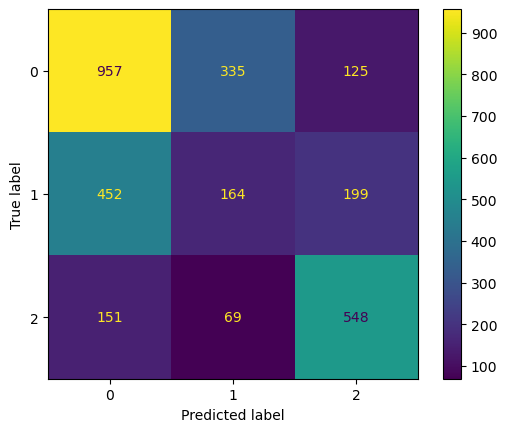

Accuracy: 0.5563333333333333
Recall: 0.5563333333333333
F1: 0.5391897658529295


In [22]:
logit_model = logistic_model.logistic_regression_game01(merged_dataframe, score_target="recall")